<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
**<center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course** </center><br>
Author: [Yury Kashnitskiy](https://yorko.github.io) (@yorko). Translated and edited by [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), [Eugene Mashkin](https://www.linkedin.com/in/eugene-mashkin-88490883/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). [mlcourse.ai](https://mlcourse.ai) is powered by [OpenDataScience (ods.ai)](https://ods.ai/) © 2017—2022

# <center>Assignment #7. Task </center> <a class="tocSkip">
    
## <center> Principal Component Analysis and Clustering </center><a class="tocSkip">

In this assignment, we are going to walk through `sklearn` built-in implementations of dimensionality reduction and clustering methods and apply these techniques to the popular "faces" dataset.


**Your task is to:**
 1. write code and perform computations in the cells below;
 2. choose answers in the [webform](https://forms.gle/W1dtNVMSVpSQBt7s5).
 
*If you are sure that something is not 100% correct with the assignment/solution, please leave your feedback via the mentioned webform ↑*


## 1. Principal Component Analysis

First import all required modules:

In [79]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="white")
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Use the given toy data set:

In [13]:
X = np.array(
    [
        [2.0, 13.0],
        [1.0, 3.0],
        [6.0, 19.0],
        [7.0, 18.0],
        [5.0, 17.0],
        [4.0, 9.0],
        [5.0, 22.0],
        [6.0, 11.0],
        [8.0, 25.0],
    ]
)

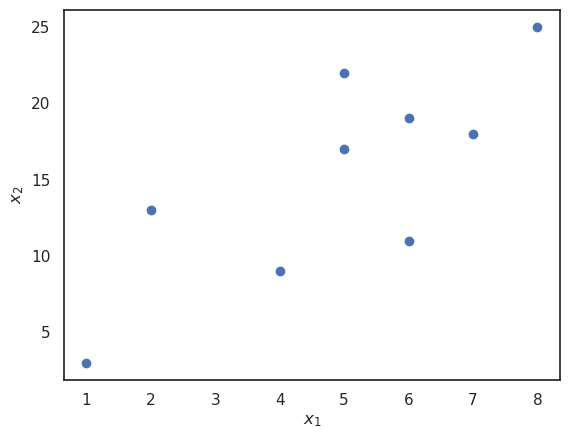

In [14]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$");

**<font color='red'>Question 1.</font> What is the angle between the $x_1$ axis and the vector corresponding to the first principal component for this data (don't forget to scale data using `StandardScaler`)?**

- 30 degrees
- 45 degrees <-
- 60 degrees
- 75 degrees

In [15]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
pca = PCA()
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)
np.rad2deg(np.arccos(pca.components_))

array([[ 45.,  45.],
       [ 45., 135.]])

**<font color='red'>Question 2.</font> What are the eigenvalues of the $X^{\text{T}}X$ matrix, given $X$, a scaled matrix from the previous question?**

 - 4 and 1.42
 - 16.2 and 2702.8
 - 4.02 and 51.99
 - 15.97 and 2.03 <-

In [16]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
M = X_pca.T.dot(X_pca)
M.diagonal()

array([15.96987204,  2.03012796])

**<font color='red'>Question 3.</font> What is the meaning of the two numbers from the previous question?**

- their squares tell what part of the initial data's variance is explained by principal components
- they define a rotation angle between the first principal component and the initial axis
- those numbers tell what part of the initial data's variance is explained by principal components <-
- the square roots of those numbers define a rotation angle between the first principal component and the initial axis

Let's load a dataset of peoples' faces and output their names. (This step requires stable, fast internet connection.)

In [17]:
lfw_people = datasets.fetch_lfw_people(
    min_faces_per_person=50, resize=0.4, data_home="../../_static/data/faces"
)

print(
    "%d objects, %d features, %d classes"
    % (lfw_people.data.shape[0], lfw_people.data.shape[1], len(lfw_people.target_names))
)
print("\nPersons:")
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


Let's look at some faces. All images are stored in a handy `lfw_people.images` array.

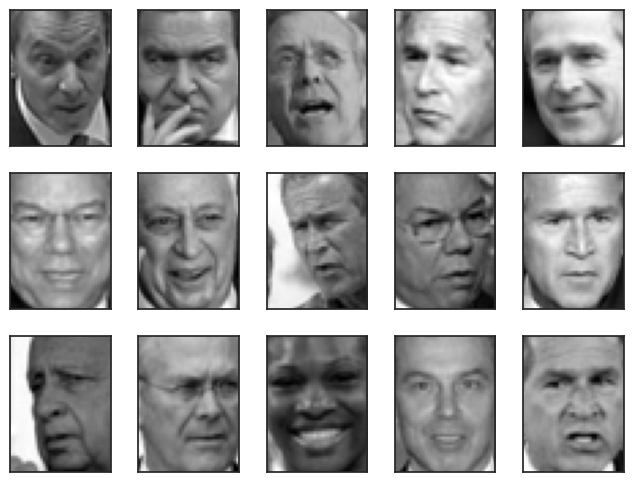

In [18]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap="gray")

**<font color='red'>Question 4.</font> What's the _minimal_ number of principal components is needed to explain 90% variance in the data (scaled using  `StandardScaler`)?**

- 75
- 76
- 77 <-
- 78

For this task, you should be using the [`svd_solver='randomized'`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) parameter, which is a PCA approximation, but it significantly increases performance on large data sets. Use fixed `random_state=1` for comparable results.

In [19]:
def get_pca_components(X, target_variance=0.9, random_state=1):
    
    pca = PCA(svd_solver="randomized", random_state=random_state).fit(X)
    a = np.cumsum(pca.explained_variance_ratio_)
    return np.argmax(a >= target_variance) + 1

In [20]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
scaler = StandardScaler()
faces_scaled = scaler.fit_transform(lfw_people.data)

n_components = get_pca_components(faces_scaled, target_variance=0.9)
n_components

89

In [28]:
pca = PCA(svd_solver="randomized", random_state=1).fit(faces_scaled)

1560 principal components explain 100.00% of variance


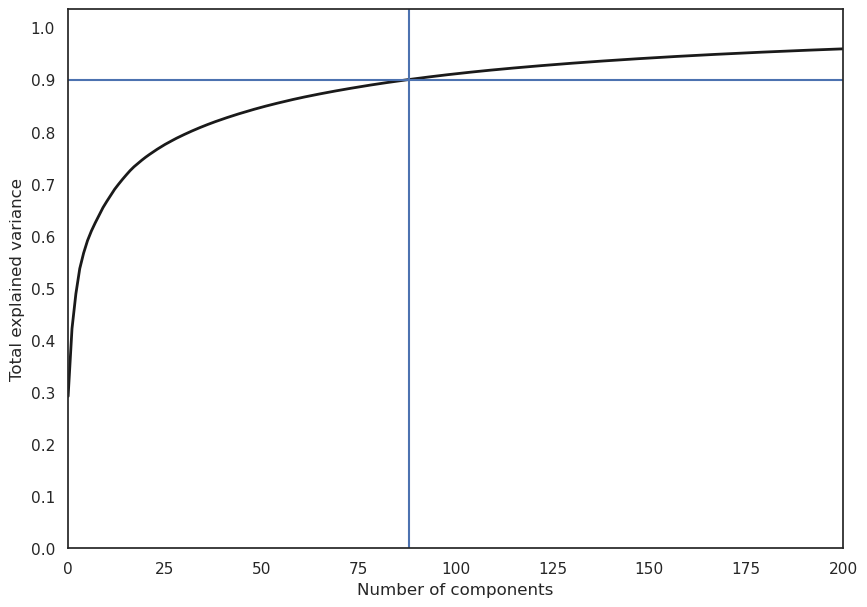

In [27]:
print(
    "%d principal components explain %.2f%% of variance"
    % (pca.n_components_, 100 * np.cumsum(pca.explained_variance_ratio_)[-1])
)
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color="k")
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9)
plt.axvline(88)
plt.show()

Print a picture showing the first 30 principal components (don't be scared when you see the results). In order to create it, use 30 vectors from `pca.components_`, reshape them to their initial size (50 x 37), and display. Specify `cmap`='binary'.

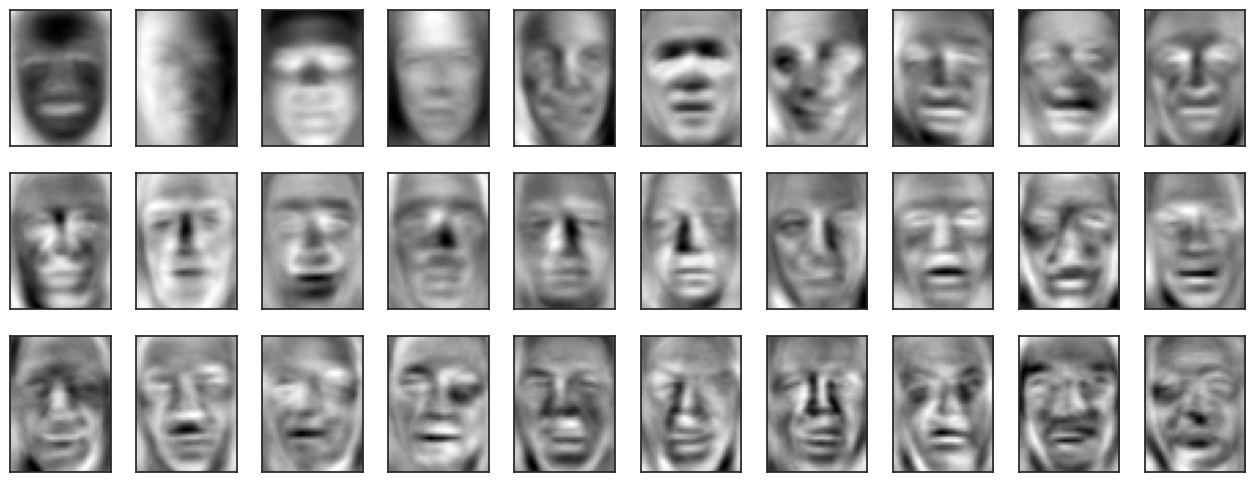

In [29]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap="binary")

**<font color='red'>Question 5.</font> Within the first 30 principal components, which one brightens the left side of the face? More specifically, which principal component corresponds to a linear combination of the initial features (pixels' intensity), which, when shown as an image, looks like a photo highlighted from the right side (the same as a face highlighted from its left side)?**

- 1
- 2 <-
- 4
- 5

Now let's create a projection of faces onto the space of the first two principal components. 

**<font color='red'>Question 6.</font> Who looks the least similar to the other people in the dataset if we only consider the two first principal components?**

To answer this question, take the first two principal components from the scaled data, evaluate two mean principal components' values for each person over all their images in the dataset (again, use both svd_solver='randomized' and random_state=1). Then, with 12 two-dimensional points, find the one which has the largest distance from the others (by Euclidean distance). You can do this either precisely or approximately using `sklearn.metrics.euclidean_distances` and `seaborn.heatmap`.

- Colin Powell
- George W Bush
- Jacques Chirac
- Serena Williams

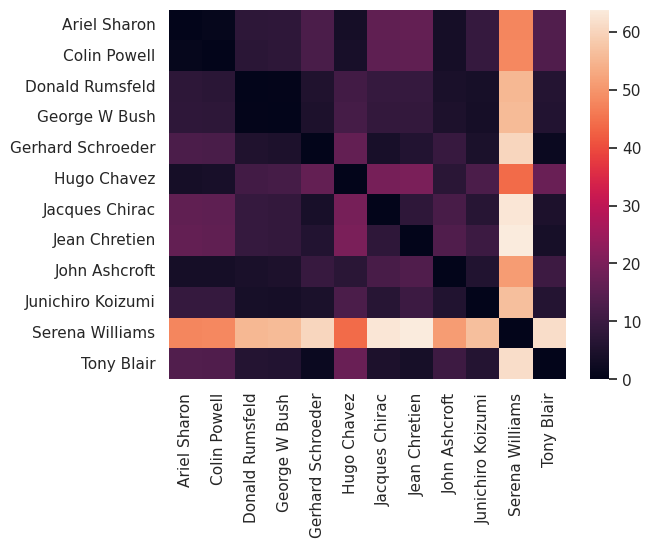

In [30]:
pca = PCA(n_components=2, svd_solver="randomized", random_state=1)
pca.fit(faces_scaled)

mean_face_centers = []

for i, name in enumerate(lfw_people.target_names):
    face = pca.transform(faces_scaled[lfw_people.target == i])
    mean_face_centers.append(face.mean(axis=0))
    
from sklearn.metrics import euclidean_distances

sns.heatmap(euclidean_distances(mean_face_centers))
plt.xticks(np.arange(12) + 0.5, lfw_people.target_names, rotation="vertical")
plt.yticks(np.arange(12) + 0.5, lfw_people.target_names, rotation="horizontal")
plt.show()

## 2. Clustering

For the next question, load the housing prices dataset:

In [37]:
#boston = datasets.load_boston()
#X = boston.data
boston = pd.read_csv('../../data/boston-housing.csv')
X = boston.drop(columns=['medv'], axis=1)
y = boston['medv']
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Using the elbow-method (reference [article 7](https://medium.com/@libfun/db7879568417) of the course), find the optimal number of clusters to set as a hyperparameter for the k-means algorithm.

**<font color='red'>Question 7.</font> What is the optimal number of clusters to use on housing prices data set according to the elbow method? Use `random_state=1` in the k-means method, and don't scale the data.**

- 2 <-
- 3
- 4
- 5

In this case, we are looking for the most significant curve fracture on the `Cluster number vs Centroid distances` graph. Consider the number of clusters from 2 to 10. Use `random_state=1` for the k-means algorithm initialization.

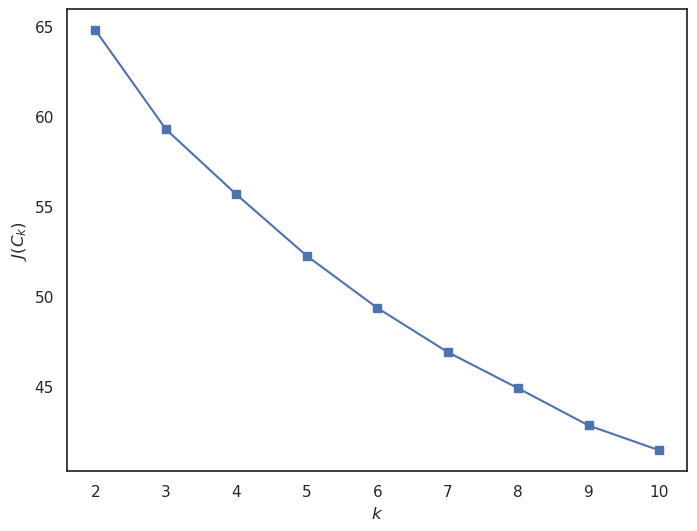

In [41]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

scale = StandardScaler()
X_scaled = scale.fit_transform(X)

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=100).fit(X_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

In [78]:
d = {}
for k in range(2, 9):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

d = pd.DataFrame.from_dict(d, orient='index', columns=['value'])
d.sort_values(by='value', ascending=True)


,value
2,0.658453
8,0.666293
6,0.817483
4,0.845878
5,0.850800
3,0.943222
7,1.028136


Go back to the faces dataset (that is already scaled). Imagine that we did not know the names for who was each photo but that we knew that there were 12 different people. Let's compare clustering results from 4 algorithms - k-means, Agglomerative clustering, Affinity Propagation, and Spectral clustering. Use the same respective parameters as in the end of [this article](https://medium.com/@libfun/db7879568417), only change the number of clusters to 12.

In [83]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

algorithms = [
    KMeans(n_clusters=12, random_state=1),
    AgglomerativeClustering(n_clusters=12),
    AffinityPropagation(),
    SpectralClustering(n_clusters=12, random_state=1, affinity="nearest_neighbors"),
]

res = []
for algo in algorithms:
    algo.fit(faces_scaled)
    res.append(
            {
                "ARI": metrics.adjusted_rand_score(lfw_people.target, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(
                    lfw_people.target, algo.labels_
                ),
                "Homogenity": metrics.homogeneity_score(
                    lfw_people.target, algo.labels_
                ),
                "Completeness": metrics.completeness_score(
                    lfw_people.target, algo.labels_
                ),
                "V-measure": metrics.v_measure_score(lfw_people.target, algo.labels_),
                "Silhouette": metrics.silhouette_score(faces_scaled, algo.labels_),
            }
    )

results = pd.DataFrame(
    data=res,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["KMeans", "Affinity", "Spectral", "Agglomerative"],
)

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.030017,0.075327,0.097799,0.086713,0.091923,0.052875
Affinity,0.023452,0.070913,0.092675,0.083420,0.087804,0.029671
Spectral,0.015685,0.113850,0.287448,0.148215,0.195583,0.017013
Agglomerative,0.029694,0.088657,0.109254,0.102512,0.105776,0.042471


**<font color='red'>Question 8.</font> Question 8. Select all of the correct statements:**

- Agglomerative clustering worked better than others according to all metrics
- Clustering results are disappointing with no metric exceeding 0.35 <-
- Considering only 2 clusters (whether it is Serena Williams or not) and comparing clustering results with a binary vector, we can see that clustering algorithms work better, with some metrics exceeding 66%

Use the coordinates of the 12 "average" people's images you got before. Draw a dendrogram for them. Use `scipy.cluster.hierarchy` and `scipy.spatial.distance.pdist`, take parameters values from the appropriate example in the [article](https://medium.com/@libfun/db7879568417).

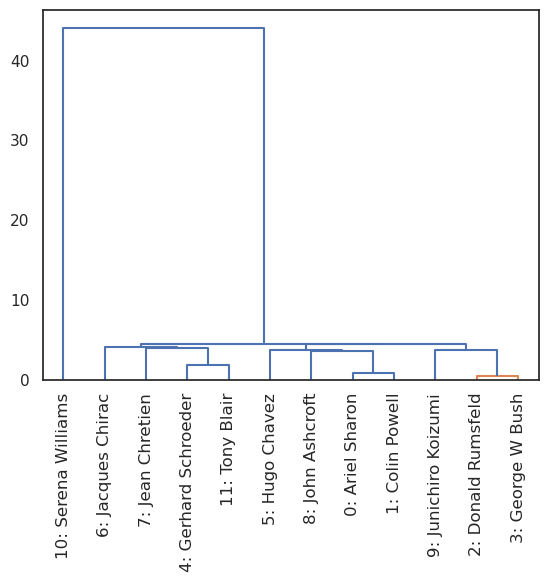

In [104]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
distance_mat = pdist(mean_face_centers)

Z = hierarchy.linkage(distance_mat, "single")

fig, ax = plt.subplots()
dn = hierarchy.dendrogram(Z, color_threshold=0.5, ax=ax)
labels = [item.get_text() + ': ' + lfw_people.target_names[int(item.get_text())] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation="vertical")
plt.show()


**<font color='red'>Question 9.</font> Look at the dendrogram and consider a step when just two clusters are left: Serena Williams vs. all.  Who was the last person added to the "big" cluster?**

- Gerhard Schroeder
- Jean Chretien <-
- John Ashcroft
- Junichiro Koizumi